In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import random

In [103]:
path_templates = './data/train_1/'
path_images = './data/test/'
templates = sorted(os.listdir(path_templates))
images = sorted(os.listdir(path_images))

In [104]:
#img_name = random.choice(images)
#img = cv.imread(f'./data/test/{img_name}')

In [105]:
img = cv.imread('./data/test/IMG_3493.JPG')

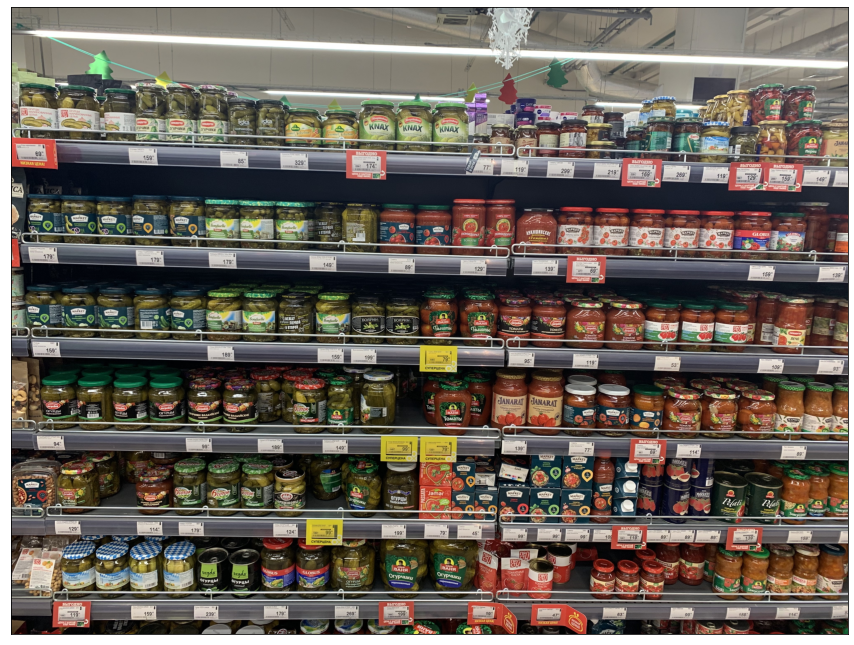

In [110]:
plt.figure(figsize = (15,15))
plt.xticks([])
plt.yticks([])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [107]:
def match_template_opencv(image_path, templates_path, template_resize_coeff=1/12, method=cv.TM_CCOEFF):
    img = cv.imread(image_path)
    plt.figure(figsize=(20, 10))
            
    templates = sorted(os.listdir(path_templates))
    for i, temp in enumerate(templates):
        template = cv.imread(templates_path + temp)
        h, w = template.shape[:-1]
        h = int(h * template_resize_coeff)
        w = int(w * template_resize_coeff)
        template = cv.resize(template, (w, h), interpolation = cv.INTER_AREA) 
        res = cv.matchTemplate(img, template, method)
        
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        if method == cv.TM_SQDIFF:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
        cv.rectangle(img, top_left, bottom_right, 255, 2)
        cv.putText(img, temp, (top_left[0], top_left[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        
        plt.subplot(1, len(templates), i+1)
        plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
        plt.title(temp[:-4]), plt.xticks([]), plt.yticks([])
    plt.show()
        
    plt.figure(figsize=(30,20))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Matches'), plt.xticks([]), plt.yticks([])
    plt.show()

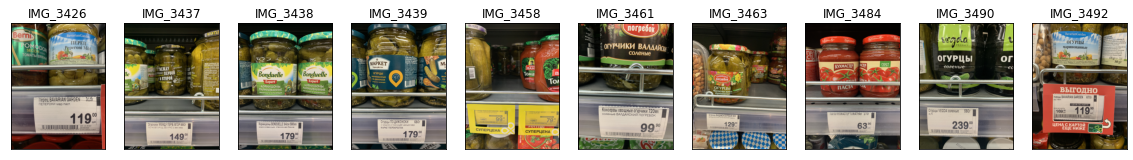

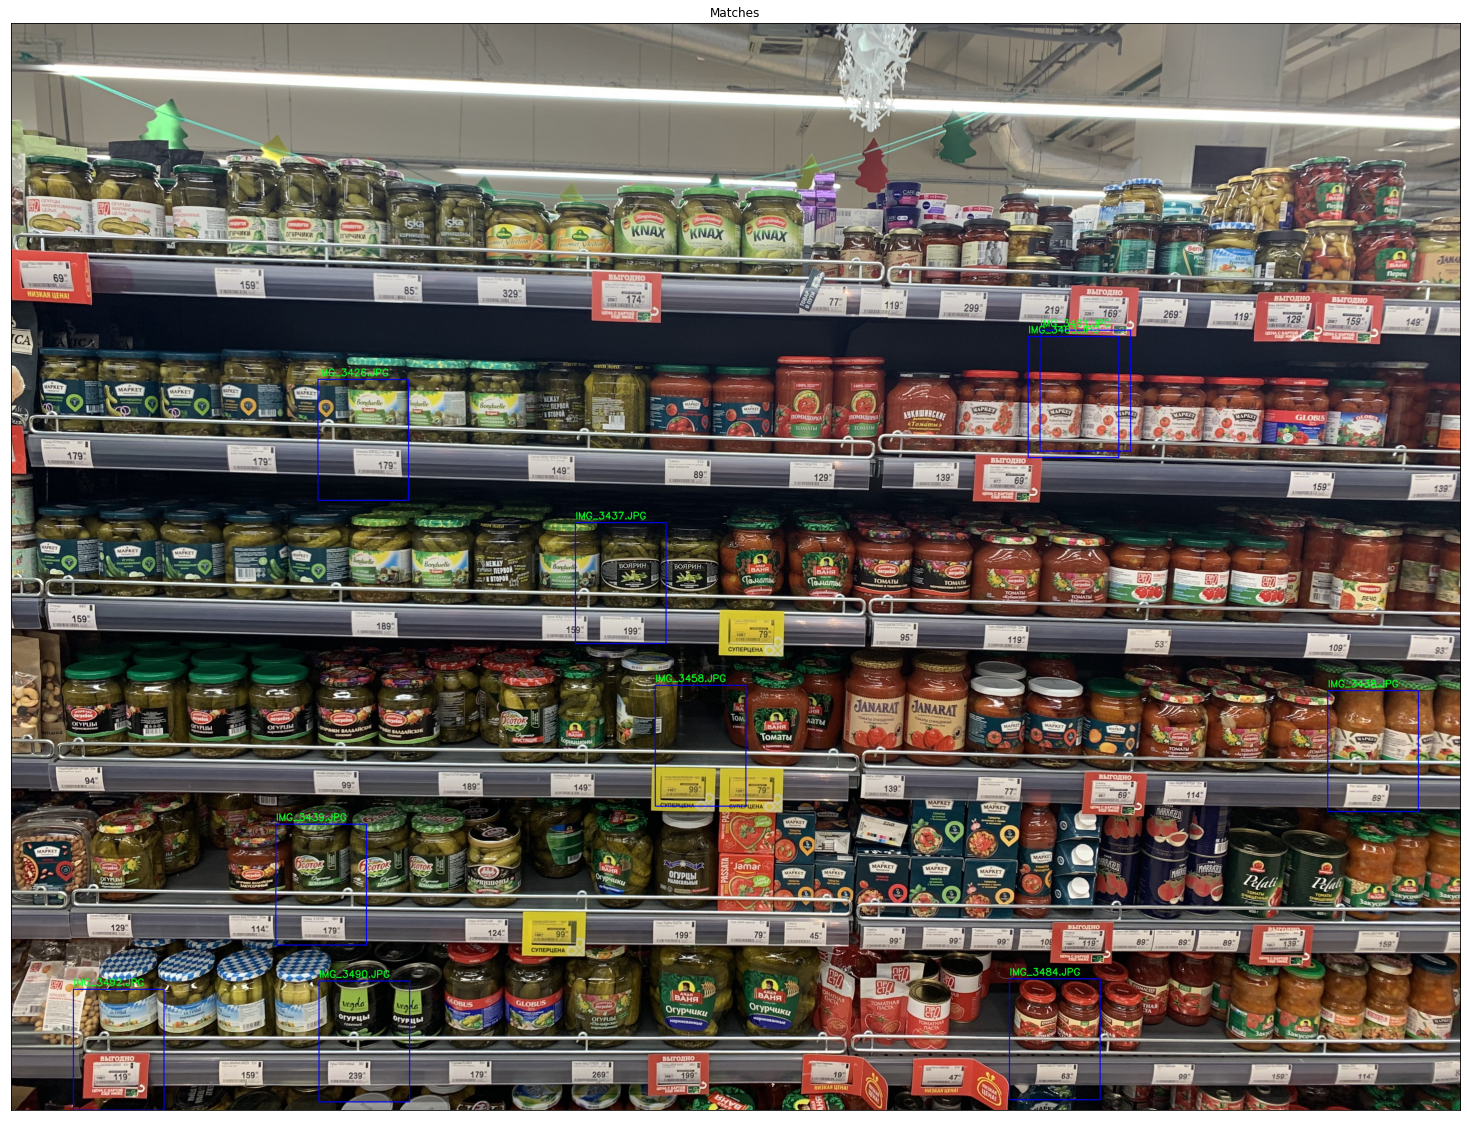

In [108]:
match_template_opencv(image_path='./data/test/IMG_3493.JPG', templates_path=path_templates)